# **Setup**

In [15]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
plt.style.use('fast')

import shap

In [3]:
Folder_Input = 'Input Data'

# **Data Import**

* https://archive.ics.uci.edu/dataset/1/abalone

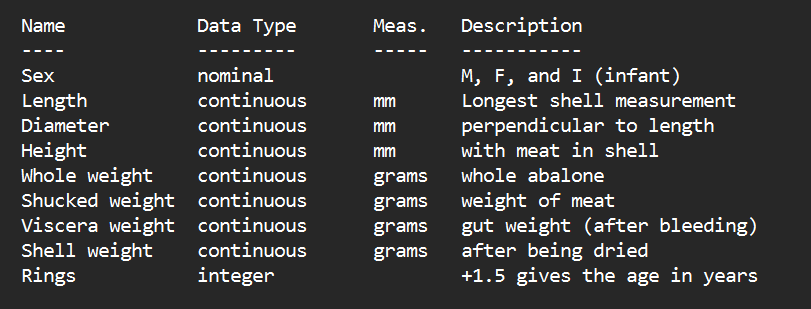

In [9]:
df = pd.read_csv(f'{Folder_Input}/abalone.data',header=None,
                 names=['Sex','Length','Diameter','Height','Whole_Weight','Shucked_Weight',
                        'Viscera_Weight','Shell_Weight','Rings'])

print(df.shape)
df.sample(10)

(4177, 9)


,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
3901,F,0.525,0.430,0.125,0.8130,0.3315,0.1660,0.1775,12
1762,M,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,12
2326,M,0.430,0.345,0.115,0.3045,0.0925,0.0550,0.1200,11
274,M,0.630,0.515,0.155,1.2590,0.4105,0.1970,0.4100,13
1991,I,0.285,0.215,0.060,0.0935,0.0310,0.0230,0.0300,6
2811,M,0.725,0.570,0.190,2.3305,1.2530,0.5410,0.5200,9
2964,M,0.670,0.525,0.170,1.4005,0.7150,0.3025,0.3870,9
554,I,0.485,0.390,0.125,0.5910,0.2870,0.1410,0.1200,9
1019,M,0.635,0.490,0.175,1.3750,0.6230,0.2705,0.3950,11
2518,M,0.500,0.400,0.130,0.7715,0.3700,0.1600,0.2110,8


# **Data Validation**

In [10]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_Weight      0
Shucked_Weight    0
Viscera_Weight    0
Shell_Weight      0
Rings             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_Weight    4177 non-null   float64
 5   Shucked_Weight  4177 non-null   float64
 6   Viscera_Weight  4177 non-null   float64
 7   Shell_Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [13]:
df.describe()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# **Data Exploration**

## **Scatterplot & Boxplot**

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

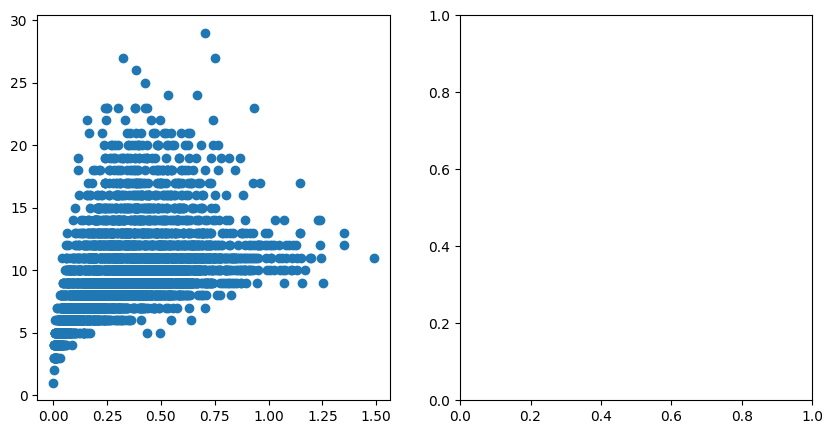

In [41]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].scatter(x=df['Shucked_Weight'],y=df['Rings'])
axs[1].boxplot(x=df['Sex'])
plt.show()

## **Correlation Heatmap**

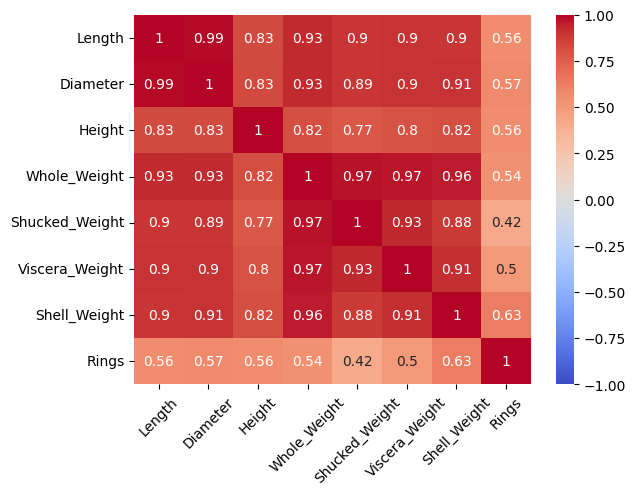

In [34]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.xticks(rotation=45)
plt.show()

# **Data Split**

In [57]:
X = df.drop(['Whole_Weight','Rings'],axis=1)
y = df['Rings']

display(X.head())
display(y.head())

,Sex,Length,Diameter,Height,Shucked_Weight,Viscera_Weight,Shell_Weight
0,M,0.455,0.365,0.095,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.0895,0.0395,0.055


0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [58]:
# Encode Sex Column
X = pd.get_dummies(X, drop_first=False).astype(float)
X.loc[:,['Sex_F','Sex_I','Sex_M']] = X.loc[:,['Sex_F','Sex_I','Sex_M']].astype(int)
X.sample(10)

,Length,Diameter,Height,Shucked_Weight,Viscera_Weight,Shell_Weight,Sex_F,Sex_I,Sex_M
2408,0.620,0.485,0.170,0.4805,0.3045,0.3300,0.0,1.0,0.0
3695,0.650,0.520,0.195,0.5985,0.2460,0.3825,1.0,0.0,0.0
2524,0.580,0.460,0.180,0.4800,0.2770,0.3250,0.0,0.0,1.0
3051,0.595,0.480,0.140,0.4095,0.1825,0.2890,0.0,0.0,1.0
1777,0.485,0.345,0.160,0.3085,0.1850,0.3190,0.0,1.0,0.0
642,0.590,0.450,0.160,0.3580,0.1560,0.3150,1.0,0.0,0.0
3395,0.605,0.450,0.165,0.3570,0.2020,0.3850,1.0,0.0,0.0
2634,0.425,0.340,0.100,0.1625,0.0820,0.0940,0.0,1.0,0.0
2910,0.580,0.445,0.150,0.4315,0.1945,0.2870,0.0,0.0,1.0
1341,0.585,0.490,0.185,0.5220,0.2535,0.3350,0.0,0.0,1.0


# **Data Models**

In [79]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
import shap
shap.initjs()

In [59]:
model01 = xgb.XGBRegressor(objective='reg:squarederror')
model01.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

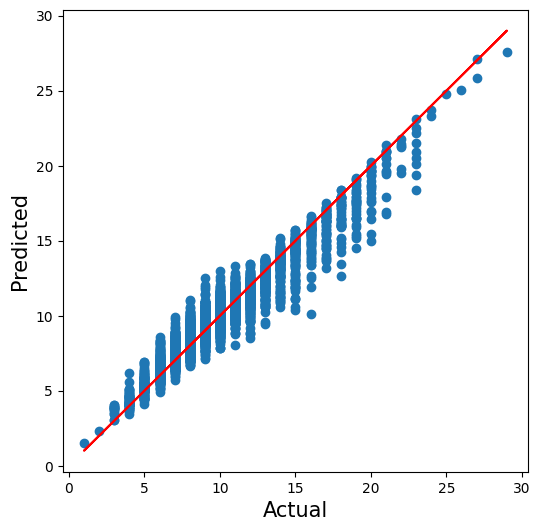

In [67]:
y_pred = model01.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(y,y_pred)
plt.plot(y,y,color='red')

plt.xlabel('Actual',size=15)
plt.ylabel('Predicted',size=15)
plt.show()

# **Model Evalution**

## **Get Shap Values**

In [71]:
explainer = shap.Explainer(model01)
shap_values = explainer(X)

print(shap_values.shape)    # One Shape Value For Each Observation

(4177, 9)


## **Waterfall Plot**

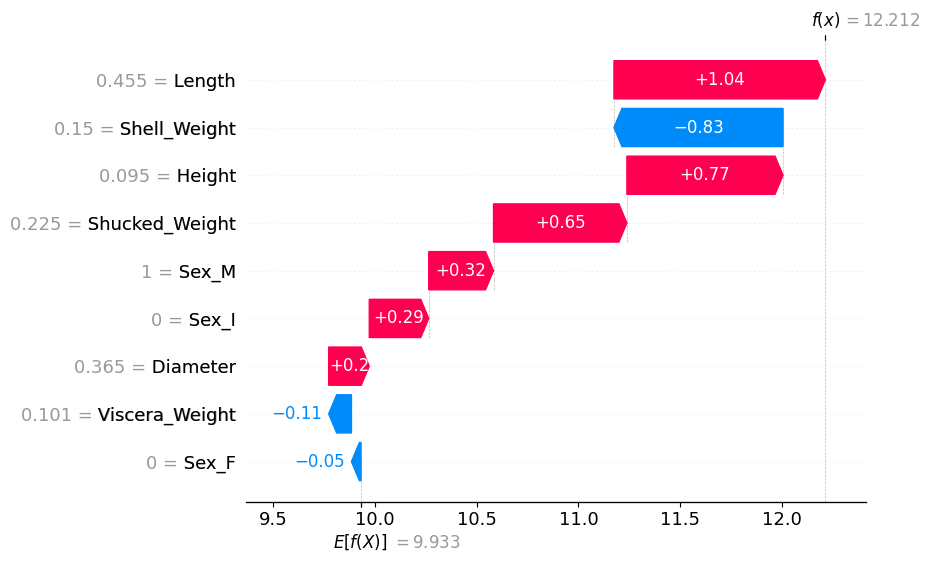

In [83]:
# Explanation For First Observation
shap.plots.waterfall(shap_values[0]) 

## **Force Plot**

In [80]:
shap.plots.force(shap_values[0])

In [84]:
# Stacked Force Plot
shap.plots.force(shap_values[0:100])

## **Mean SHAP**

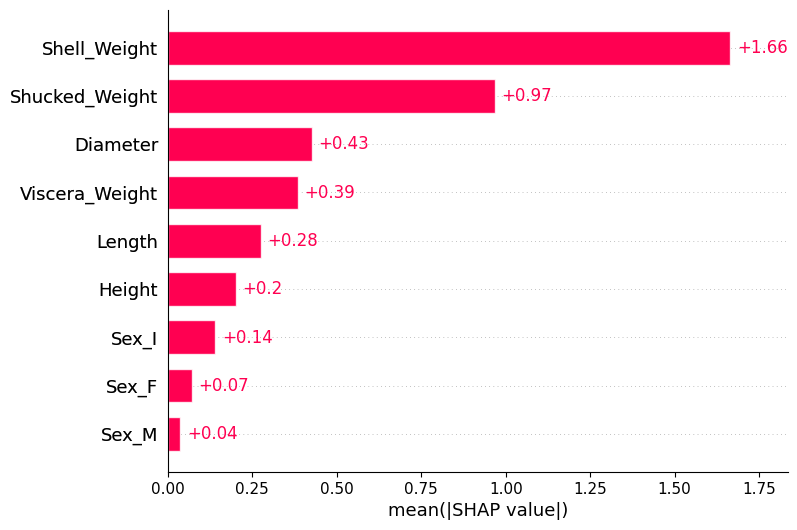

In [85]:
shap.plots.bar(shap_values)

## **BeeSwarm Plot**

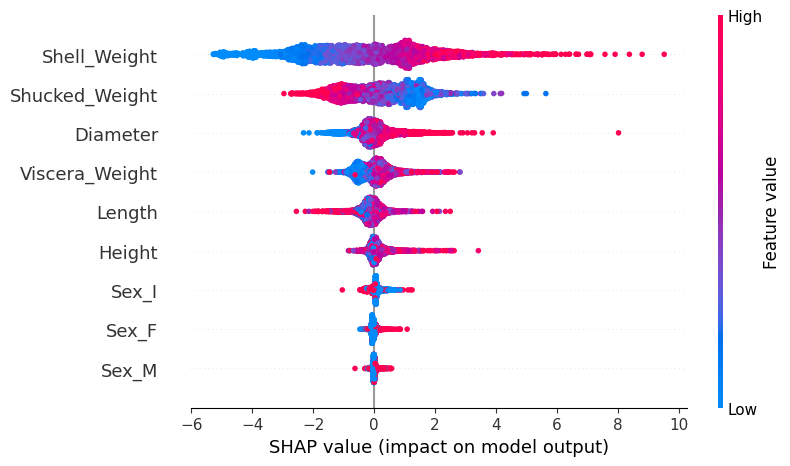

In [86]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

## **Dependence Plot**